In [1]:
import requests
from bs4 import BeautifulSoup

r = requests.get("https://lol.garena.tw/champions") #將此頁面的HTML GET下來
soup = BeautifulSoup(r.text,"html.parser")

In [39]:
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36"
}
r = requests.get("https://www.op.gg/champions/sett", headers = headers)

In [40]:
soup = BeautifulSoup(r.text,"html.parser")

In [41]:
sel = soup.body.div.find('div', id = 'content-header').div.div.div.div.find_all('a')

In [43]:
sel[0]['data-value']

'top'

In [47]:
[(sel[i]['data-value'] if sel[i]['data-value'] != 'support' else 'sup')for i in range(len(sel))]

['top', 'mid', 'sup']

In [46]:
l = ['top', 'mid']
'mid' in l

True

In [15]:
sel = soup.body.div.div.div.div.div.find_all('a')

AttributeError: 'NoneType' object has no attribute 'div'

In [2]:
sel = soup.select("span.name")

In [3]:
for s in sel:
    print(s.text) 

厄薩斯
阿璃
阿卡莉
埃可尚
亞歷斯塔
阿姆姆
艾妮維亞
安妮
亞菲利歐
艾希
翱銳龍獸
阿祈爾
巴德
貝爾薇斯
布里茨
布蘭德
布郎姆
凱特琳
卡蜜兒
卡莎碧雅
科加斯
庫奇
達瑞斯
黛安娜
達瑞文
蒙多醫生
艾克
伊莉絲
伊芙琳
伊澤瑞爾
費德提克
菲歐拉
飛斯
加里歐
剛普朗克
蓋倫
吶兒
古拉格斯
葛雷夫
關
赫克林
漢默丁格
伊羅旖
伊瑞莉雅
埃爾文
珍娜
嘉文四世
賈克斯
杰西
燼
吉茵珂絲
凱莎
克黎思妲
卡瑪
卡爾瑟斯
卡薩丁
卡特蓮娜
凱爾
慨影
凱能
卡力斯
鏡爪
克雷德
寇格魔
卡桑帝
勒布朗
李星
雷歐娜
莉莉亞
麗珊卓
路西恩
露璐
拉克絲
墨菲特
馬爾札哈
茂凱
易大師
好運姐
悟空
魔鬥凱薩
魔甘娜
娜米
納瑟斯
納帝魯斯
妮可
奈德麗
淣菈
夜曲
努努和威朗普
歐拉夫
奧莉安娜
鄂爾
潘森
波比
派克
姬亞娜
葵恩
銳空
拉姆斯
雷珂煞
銳兒
睿娜妲．格萊斯克
雷尼克頓
雷葛爾
雷玟
藍寶
雷茲
煞蜜拉
史瓦妮
姍娜
瑟菈紛
賽特
薩科
慎
希瓦娜
辛吉德
賽恩
希維爾
史加納
索娜
索拉卡
斯溫
賽勒斯
星朵拉
貪啃奇
塔莉雅
塔隆
塔里克
提摩
瑟雷西
崔絲塔娜
特朗德
泰達米爾
逆命
圖奇
烏迪爾
烏爾加特
法洛士
汎
維迦
威寇茲
薇可絲
菲艾
維爾戈
維克特
弗拉迪米爾
弗力貝爾
沃維克
剎雅
齊勒斯
趙信
犽宿
犽凝
約瑞科
悠咪
札克
劫
婕莉
希格斯
極靈
柔依
枷蘿


In [4]:
from pypinyin import lazy_pinyin

In [5]:
print(lazy_pinyin(sel[0]))

['e', 'sa', 'si']


In [6]:
lazy_pinyin('惡薩斯')

['e', 'sa', 'si']

In [7]:
lazy_pinyin('234')

['234']

In [8]:
lazy_pinyin('二三四')

['er', 'san', 'si']

In [9]:
import difflib

In [10]:
def string_similar(s1, s2):
    return difflib.SequenceMatcher(None, s1, s2).quick_ratio()

In [11]:
string_similar('er san si', 'e sa si')

0.875

In [12]:
string_similar('惡薩斯', '二三四')

0.0

In [13]:
def get_name(name):
    name_list = lazy_pinyin(name)
    ret_name = name_list[0]
    for i in name_list[1:]:
        ret_name += (' '+i)
    return ret_name

def find_champions(name):
    input_name = get_name(name)
    similar_list = [string_similar(input_name, get_name(hero.text)) for hero in sel]
    return sel[similar_list.index(max(similar_list))].text

In [14]:
find_champions('睿娜妲')

'達瑞文'

In [48]:
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36"
}
r = requests.get("https://www.op.gg/champions/drmundo/top/runes?region=global&tier=platinum_plus", headers = headers) #將此頁面的HTML GET下來
soup = BeautifulSoup(r.text,"html.parser")
sel = soup.find_all("tbody")
imgs = sel[0].tr.div.find_all("img")

In [49]:
import numpy as np
import urllib.request
from PIL import Image
import matplotlib.pyplot as plt
import cv2

In [50]:
offset = [[4, 108], [72, 0], [72, 108], [72, 216], [144, 0], [144, 108], [144, 216], [216, 0], [216, 108], [216, 216], [288, 0], [288, 108], [288, 216],
          [72, 420], [144, 312], [144, 420], [144, 528], [216, 312], [216, 420], [216, 528], [288, 312], [288, 420], [288, 528],
          [144, 624], [144, 696], [144, 768], [222, 624], [222, 696], [222, 768], [300, 624], [300, 696], [300, 768]]

def get_runes_img(tags):
    bg = np.zeros((348,864,3), dtype='uint8')
    bg[:,:,:] = 255
    
    for i in range(32):
        URL = tags[i]['src']
        urllib.request.urlretrieve(URL, "t.png")
        img = np.array(Image.open('t.png'))
        if i < 32-9:
            #img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA)
            bg = cv2.circle(bg, (offset[i][1]+28+20, offset[i][0]+28), 28, (0, 0, 0), -1)
        else:
            #img = cv2.resize(img, (24, 24), interpolation=cv2.INTER_AREA)
            bg = cv2.circle(bg, (offset[i][1]+24+20, offset[i][0]+24), 24, (0, 0, 0), -1)
            
        bg[np.where(img[:,:,3] > 0)[0]+offset[i][0],np.where(img[:,:,3] > 0)[1]+offset[i][1]+20,:] = img[np.where(img[:,:,3] > 0)[0],np.where(img[:,:,3] > 0)[1],0:3]
    return bg

In [51]:
runes = get_runes_img(imgs)

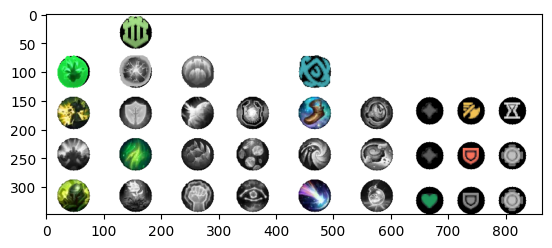

In [52]:
plt.imshow(runes)

In [54]:
im = Image.fromarray(runes)
print(im.size)

(864, 348)


In [55]:
im.save('t1.png')

In [24]:
r = requests.get("https://www.op.gg/champions/drmundo/top/items?region=global&tier=platinum_plus", headers = headers) #將此頁面的HTML GET下來
soup = BeautifulSoup(r.text,"html.parser")
item_img_tags = soup.tbody.tr.div.div.find_all("img")

In [25]:
item_img_tags

[<img alt="Heartsteel" class="bg-image" height="32" src="https://opgg-static.akamaized.net/meta/images/lol/item/3084.png?image=q_auto,f_webp,w_64&amp;v=1671719902370" width="32"/>,
 <img alt="Sunfire Aegis" class="bg-image" height="32" src="https://opgg-static.akamaized.net/meta/images/lol/item/3068.png?image=q_auto,f_webp,w_64&amp;v=1671719902370" width="32"/>,
 <img alt="Spirit Visage" class="bg-image" height="32" src="https://opgg-static.akamaized.net/meta/images/lol/item/3065.png?image=q_auto,f_webp,w_64&amp;v=1671719902370" width="32"/>]

In [32]:
def get_items_img(tags):
    items_num = len(tags)
    bg = np.zeros((64,items_num*64+(items_num-1)*48,3), dtype='uint8')
    bg[:,:,:] = 255
    arrow = np.array(Image.open('arrow.png'))
    for i in range(items_num):
        URL = tags[i]['src']
        urllib.request.urlretrieve(URL, "t.png")
        img = np.array(Image.open('t.png'))
        bg[:,i*112+0:i*112+64,:] = img[:,:,0:3]
        if i != items_num-1:
            bg[8:56,i*112+64:i*112+112,:] = arrow[:,:,:]
    return bg

In [33]:
items = get_items_img(item_img_tags)

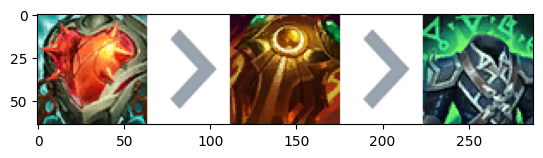

In [34]:
plt.imshow(items)

In [47]:
r = requests.get("https://www.op.gg/champions/drmundo/top/skills?region=global&tier=platinum_plus", headers = headers) #將此頁面的HTML GET下來
soup = BeautifulSoup(r.text,"html.parser")
skill_tags = soup.aside.section.ul.li.div.find_all('div', class_='skill_command_box')

In [50]:
print(skill_tags[0].text+' > '+skill_tags[1].text+' > '+skill_tags[2].text)

Q > E > W
